# Import dataset csv

In [1]:
import pandas as pd
train_data = pd.read_csv(r'../data/train.csv')
test_data = pd.read_csv(r'../data/test.csv')

# Importar matrizes de conectividade

In [2]:
import numpy as np
import scipy.io

train_mat = scipy.io.loadmat('../data/train_data.mat') 
test_mat = scipy.io.loadmat('../data/test_data.mat') 

In [3]:
def get_data_from_mat(train_file,test_file):
    train_mat = scipy.io.loadmat(train_file) 
    test_mat = scipy.io.loadmat(test_file) 
    print(train_mat.keys())
    print(test_mat.keys())
    train_np = np.array(train_mat['train_data']).transpose(2,0,1)
    test_np = np.array(test_mat['test_data']).transpose(2,0,1)
    print(train_np.shape)
    print(test_np.shape)
    return  train_np, test_np


train_mat, test_mat = get_data_from_mat('../data/train_data.mat','../data/test_data.mat')

dict_keys(['__header__', '__version__', '__globals__', 'train_data'])
dict_keys(['__header__', '__version__', '__globals__', 'test_data'])
(112, 90, 90)
(28, 90, 90)


# Visualisar os dados

# Treinar o modelo 1 - Utilizar os dados das matrizes e apenas as labels do csv


In [4]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5260884179118882179
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1405881344
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9615159795956632338
physical_device_desc: "device: 0, name: NVIDIA GeForce MX230, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [5]:
#para melhor gestão memória GPU por parte do tensorflow

def set_keras_backend(backend):
    print("A acertar o backend e libertar memória da grafica")
    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        importlib.reload(K)
        assert K.backend() == backend
    if backend == "tensorflow":
        # Allow memory growth for the GPU
        physical_devices = tf.config.experimental.list_physical_devices('GPU')
        print(physical_devices)
        tf.config.experimental.set_memory_growth(physical_devices[0], True)  
  
  
set_keras_backend("tensorflow")

A acertar o backend e libertar memória da grafica
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [7]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense, Embedding
from livelossplot.inputs.tf_keras import PlotLossesCallback

y_train = train_data['age']
x_train = train_mat
x_train = tf.expand_dims(x_train, axis=-1)

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(90,90,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 88, 88, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 128)       147584    
_________________________________________________________________
flatten (Flatten)            (None, 46208)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5

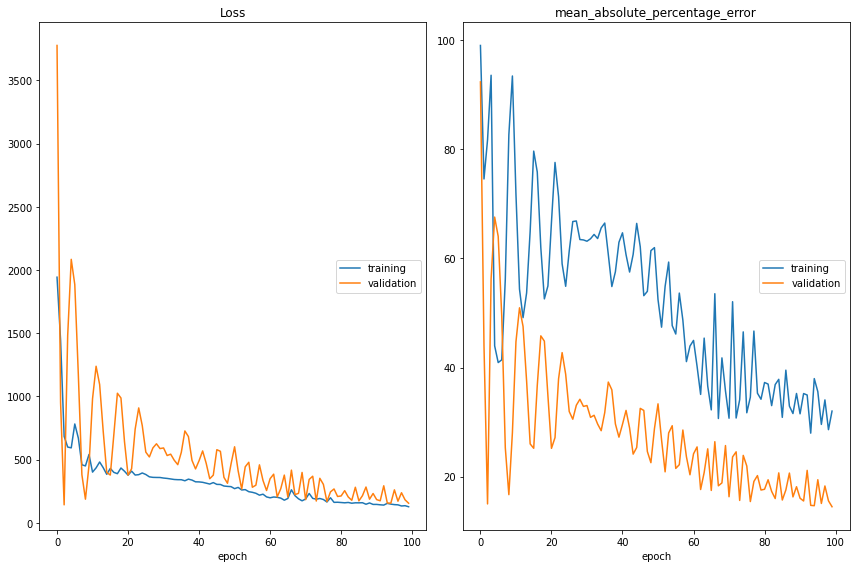

Loss
	training         	 (min:  127.522, max: 1943.472, cur:  127.522)
	validation       	 (min:  142.559, max: 3776.772, cur:  155.437)
mean_absolute_percentage_error
	training         	 (min:   27.975, max:   99.009, cur:   32.018)
	validation       	 (min:   14.492, max:   92.334, cur:   14.492)


In [8]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_absolute_percentage_error')
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[PlotLossesCallback()])

# Aplicar o modelo às matrizes de treino

In [9]:
print("Evaluate")
train_mat = tf.expand_dims(train_mat, axis=-1)
result = model.predict(train_mat)
print(result)

Evaluate
[[21.869642]
 [23.747221]
 [33.04376 ]
 [23.62594 ]
 [25.201208]
 [42.24715 ]
 [32.515953]
 [22.347317]
 [30.602518]
 [29.699926]
 [33.396366]
 [22.15874 ]
 [37.882526]
 [28.861855]
 [19.228016]
 [27.66103 ]
 [22.322378]
 [26.571247]
 [26.387228]
 [28.932138]
 [24.172009]
 [21.53071 ]
 [23.585258]
 [28.620687]
 [27.03687 ]
 [23.772297]
 [36.97513 ]
 [30.35581 ]
 [30.387459]
 [29.220938]
 [24.822275]
 [27.488377]
 [28.155493]
 [27.646435]
 [24.063818]
 [30.41034 ]
 [32.7477  ]
 [25.70549 ]
 [31.870653]
 [25.521603]
 [32.267418]
 [25.454857]
 [34.205383]
 [29.00814 ]
 [27.286274]
 [24.492537]
 [28.1415  ]
 [25.501717]
 [24.339449]
 [18.317059]
 [23.116829]
 [25.191614]
 [32.608265]
 [26.537102]
 [31.066925]
 [71.09389 ]
 [51.5879  ]
 [71.74317 ]
 [44.70894 ]
 [64.581665]
 [51.5703  ]
 [65.11437 ]
 [69.60058 ]
 [72.83504 ]
 [55.733177]
 [73.714935]
 [75.88472 ]
 [55.715183]
 [56.86359 ]
 [86.987015]
 [58.786304]
 [58.573444]
 [74.11863 ]
 [78.87796 ]
 [52.2731  ]
 [45.765923]
 [5

In [10]:
valores = []
for x in result:
    for y in x:
        valores.append(y)

In [11]:
train_data['Valores CNN'] = valores

# Treinar o modelo 2 - com os dados todos do csv mais os resultados do primeiro treino

In [12]:
train_data.shape

(112, 5)

In [13]:
train_data.describe()

,id,age,sex,education,Valores CNN
count,112.000000,112.000000,112.000000,112.000000,112.000000
mean,56.500000,44.312500,0.482143,9.035714,45.366089
std,32.475632,22.642156,0.501927,4.909870,19.198248
min,1.000000,13.000000,0.000000,0.000000,18.317059
25%,28.750000,20.000000,0.000000,4.000000,27.437851
50%,56.500000,51.500000,0.000000,9.000000,44.435375
75%,84.250000,65.250000,1.000000,12.000000,61.809852
max,112.000000,79.000000,1.000000,20.000000,86.987015


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           112 non-null    int64  
 1   age          112 non-null    int64  
 2   sex          112 non-null    int64  
 3   education    112 non-null    int64  
 4   Valores CNN  112 non-null    float32
dtypes: float32(1), int64(4)
memory usage: 4.1 KB


In [15]:
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(4,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='relu'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 33,473
Trainable params: 33,473
Non-trainable params: 0
_________________________________________________________________


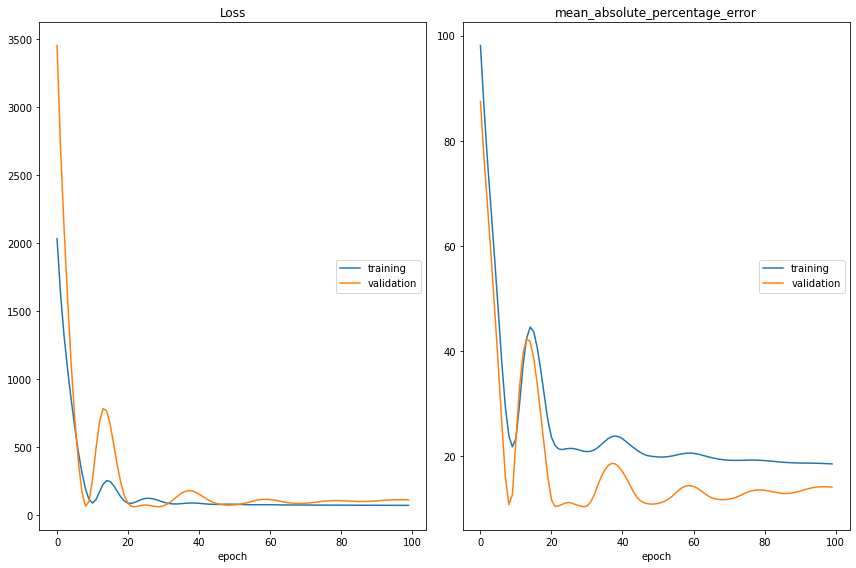

Loss
	training         	 (min:   72.471, max: 2034.483, cur:   72.471)
	validation       	 (min:   62.362, max: 3455.955, cur:  113.133)
mean_absolute_percentage_error
	training         	 (min:   18.592, max:   98.141, cur:   18.592)
	validation       	 (min:   10.449, max:   87.518, cur:   14.174)


In [16]:
model2.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_absolute_percentage_error')

x_train = train_data.drop(['age'], axis=1)
y_train = train_data['age']

history2 = model2.fit(x_train, y_train, epochs=100, batch_size=256,validation_split=0.15, callbacks=[PlotLossesCallback()])

# Resultados com model e o modelo2

In [17]:
print("Evaluate Teste com o model (CNN)")
teste_mat = tf.expand_dims(test_mat, axis=-1)
result = model.predict(teste_mat)

valores = []
for x in result:
    for y in x:
        valores.append(y)
        
test_data['Valores CNN'] = valores

result = model2.predict(test_data)
print(result)

Evaluate Teste com o model (CNN)
[[13.109576 ]
 [13.6337805]
 [11.915069 ]
 [13.56906  ]
 [12.263364 ]
 [13.544792 ]
 [32.065666 ]
 [24.170439 ]
 [27.211018 ]
 [29.796589 ]
 [31.510862 ]
 [32.110344 ]
 [34.863197 ]
 [29.541006 ]
 [16.611235 ]
 [21.787577 ]
 [17.486567 ]
 [23.36113  ]
 [22.95075  ]
 [22.638102 ]
 [39.351162 ]
 [31.85802  ]
 [37.219036 ]
 [44.90696  ]
 [38.352894 ]
 [38.40583  ]
 [37.01536  ]
 [34.864285 ]]


# Prepare submission

In [18]:
with open("submissaoPedro.csv", "w") as sub:
    # Writing data to a file
    sub.write('id,age\n')
    for i in test_data['id']:
        sub.write(str(i)+','+str(result[i-1][0])+'\n')
    